In [1]:
# 기본적인 import들
# 이후 그래프 그리는 코드에는 중복으로 적지 않음.
# 다른 곳으로 그래프 그리는 코드를 복사-붙이기 할 때는 
# 이 import 코드와 함께 복사-붙이기 해야함
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as mfm
from matplotlib.patches import Rectangle, Circle, PathPatch, Arc, FancyArrowPatch
from mpl_toolkits.mplot3d import Axes3D, proj3d

# numpy 출력 형식 지정
np.set_printoptions(precision=4, linewidth=150)

# matplotlib 스타일 지정
mpl.style.use('bmh')
mpl.style.use('seaborn-whitegrid')
style = plt.style.library['bmh']
# 스타일 컬러를 쉽게 쓸 수 있도록 리스트 저장
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

# 그림을 로컬 폴더에 저장하고 싶으면 True로 수정 
file_print = False

In [2]:
# 구글 colab 환경일 경우 그래프에 한글 폰트 사용을 위한 설정
path = 'noviceml/font/NanumBarunGothic.ttf'
fontprop = mfm.FontProperties(fname=path, size=18)

In [3]:
def arrowed_spines(fig, ax, remove_ticks=False):
    """
    https://stackoverflow.com/questions/33737736/matplotlib-axis-arrow-tip
    """
    xmin, xmax = ax.get_xlim() 
    ymin, ymax = ax.get_ylim()

    # removing the default axis on all sides:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)

    if remove_ticks == True: 
        # removing the axis ticks
        plt.xticks([]) # labels 
        plt.yticks([])
        ax.xaxis.set_ticks_position('none') # tick markers
        ax.yaxis.set_ticks_position('none')

    # get width and height of axes object to compute 
    # matching arrowhead length and width
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = 1./50.*(ymax-ymin) 
    hl = 1./25.*(xmax-xmin)
    lw = 1. # axis line width
    ohg = 0.4 # arrow overhang

    # compute matching arrowhead length and width
    yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
    yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

    # draw x and y axis
    ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
             head_width=hw, head_length=hl, #overhang = ohg, 
             length_includes_head= True, clip_on = False) 

    ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
             head_width=yhw, head_length=yhl, #overhang = ohg, 
             length_includes_head= True, clip_on = False)

In [4]:
class Arrow3D(FancyArrowPatch):
    """
    https://stackoverflow.com/questions/22867620/putting-arrowheads-on-vectors-in-matplotlibs-3d-plot
    """
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

# 최적화 : 눈먼 등산객이 언덕 가장 낮은 곳을 찾아가는 방법
- 주어진 함수에서 가장 작은 함숫값을 찾는 문제
- 함수가 여러 개일 경우 최솟값을 찾기 힘든 경우가 많음
- 목적함수(비용함수, 손실함수, loss function) : 최적화 문제에서 최소화시켜야 할 변수가 주어진 함수
- 설계변수(design variable / 모수, parameter) : 목적함숫값을 변화시키는 변수
- 제약조건(constraint) : 설계변수가 지켜야 할 조건

#### 책에서는 제약조건이 없는 비제약 최적화만 설명

## 테일러급수
- 설계변수(파라미터)는 기본적으로 만족시켜야 할 조건이 있음
    - 어떤 변숫값 x가 f(x)를 최소로 만들 만한 자격이 있는가를 판단하는 조건이 있다는 것
- 테일러 급수를 사용하여 다변수 함수에서 x가 함수 f(x)를 최소화시키는 최솟점이 될 수 있는지 확인
- 테일러급수의 정의 : 도함수들의 한 점에서의 값으로 계산된 항의 무한합으로 해석함수를 나타내는 방법
- 근사식을 사용하여 근사값을 계산

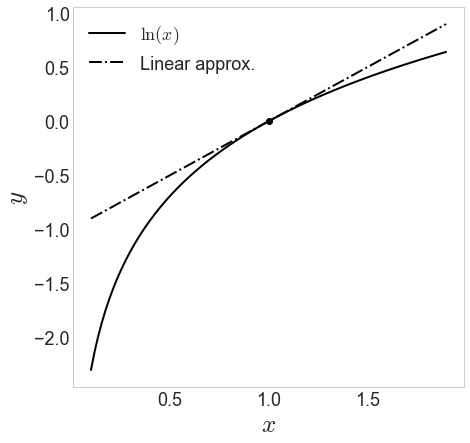

In [5]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)
ax.grid(False)

f = lambda x: np.log(x)
df = lambda x: 1/x

x = np.linspace(0.1, 1.9, 100)

x0 = 1
L = lambda x: f(x0)+df(x0)*(x-x0)

ax.plot(x, f(x), color='k',  label=r"$\ln(x)$")
ax.plot(x, L(x), '-.', color='k', label="Linear approx.")
ax.plot(1, 0, 'o', color='k')

ax.legend(fontsize=18)

if file_print == True :
    fig.savefig("imgs/chap8/fig8-1.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap8/fig8-1.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

- 위의 방법은 선형근사(linear approximation)
- 근사하고자 하는 함수가 곡선이므로 곡선으로 근사 (2차 근사식 사용)

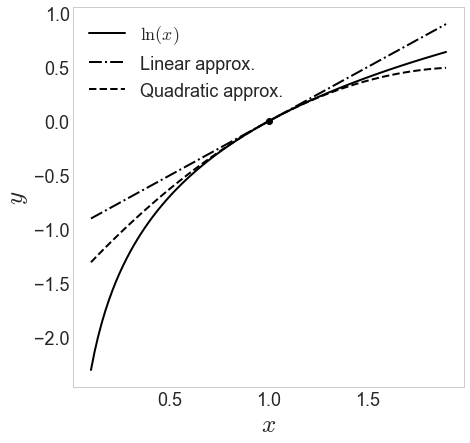

f(1.5)=0.405465, L(1.5)=0.500000, Q(1.5)=0.375000


In [6]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)
ax.grid(False)

f = lambda x: np.log(x)
df = lambda x: 1/x
df2 = lambda x: -1/x**2

x = np.linspace(0.1, 1.9, 100)

x0 = 1
Q = lambda x: f(x0)+df(x0)*(x-x0)+(1/2)*df2(x0)*(x-x0)**2

ax.plot(x, f(x), color='k', label=r"$\ln(x)$")
ax.plot(x, L(x), '-.', color='k', label="Linear approx.")
ax.plot(x, Q(x), '--', color='k', label="Quadratic approx.")
ax.plot(1, 0, 'o', color='k')
ax.legend(fontsize=18)

if file_print == True :
    fig.savefig("imgs/chap8/fig8-2.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap8/fig8-2.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

print( "f(1.5)={:.6f}, L(1.5)={:.6f}, Q(1.5)={:.6f}".format(f(1.5), L(1.5), Q(1.5)) )

- 조금 더 넓은 범위에서 원래 함수와 비슷해짐
- 미분계수를 이용하면 어떤 함수를 다항식으로 근사할 수 있음
    - 주어진 함수를 연속해서 미분가능하다면 다항식의 차수를 높여가면서 특정위치를 기준으로 점점 더 정확한 근사함수 생성가능
- 다항식의 합으로 어떤 함수를 나타낸 것을 테일러급수라고 함
- 테일러급수의 유용성 확인위해 sin(x)를 x = 0에서 테일러급수로 근사

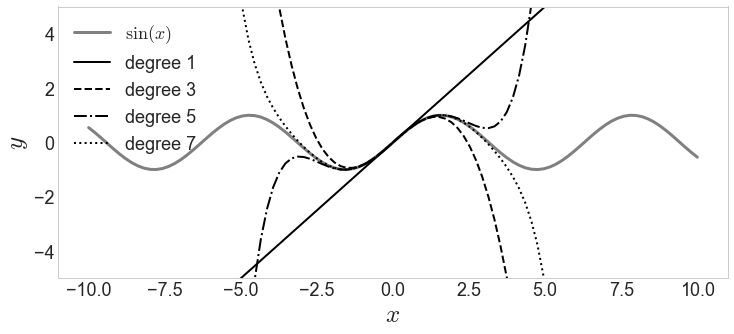

In [7]:
import math

degrees = (1, 3, 5, 7)
ls = ('-', '--', '-.', ':')

def  taylor_e(x, a, n) :
    """
    x* = a 에서 전개
    f(x) = f(a) + f'(a)*(x-a) + (1/2!)f''(a)(x-a)^2 + ... + (1/k!)f^(k)(a)(x-a)^k + R_k
    """
    signs  = (1, -1, -1, 1)
    derivs = (np.cos, np.sin, np.cos, np.sin)

    fx =  np.sin(a) 
    
    for i in range(1, n+1) : 
        fx += (signs[(i%4)-1]*derivs[(i%4)-1](a)) / math.factorial(i)*(x-a)**i
    
    return fx
    
x = np.linspace(-10, 10, 100)
y = np.sin(x)

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1, 1, 1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)
ax.grid(False)

taylors = (taylor_e(x, 0, i) for i in degrees)
ax.plot(x, y , lw=3, color='gray', 
        label="$\sin(x)$")

for i, taylor in enumerate(taylors) :
    ax.plot(x, taylor, lw=2, ls=ls[i], color='k', 
            label="degree {}".format(degrees[i]))


ax.legend(fontsize=18);
ax.set_ylim([-5, 5])

# plt.suptitle("Taylor series, order=1,2,3", fontsize=15)

if file_print == True :
    fig.savefig("imgs/chap8/fig8-3.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap8/fig8-3.pdf", format='pdf', bbox_inches='tight')

plt.show()

- 차수가 올라갈수록 x = 0을 중심으로 점점 sin(x)와 닮아가는 것 확인

### 다변수함수에 테일러급수 적용
- 이변수 함수의 예
    - 1차항 부분 : 변수가 두개이므로 미분계수가 편미분계수로 바뀌어 항이 2개로 늘어남
    - 2차항 부분 : 변수 두개로 두 번 편미분하므로 항 수가 4개
    - 하지만 각 변수에 대해서 한번 미분한 미분계수를 xi* 로부터 약간 떨어진 (xi - xi*)와 곱한다는 점은 동일
    

## 함수의 최대, 최소, 극대, 극소
- 최대, 최소, 극대, 극소가 어떤 상태를 나타내는지 알아보기

### 열린구간과 닫힌구간
- a < b인 두 실수 a, b에 대해서 구간 I를 I = (a, b)로 정의하면
    - I는 a와 b를 포함하지 않으며 이 경우 구간 I를 열린 구간이라고 함
- I = [a, b]로 정의하면
    - 두 끝점 a, b를 포함하며 닫힌 구간이라고 함
- 함수의 최대, 최소는 주어진 구간에서 생각하며 구간이 열린 / 닫힌 구간인지에 따라 최대, 최소의 존재여부가 결정됨

### 최대와 최소
- 함수 f(x)의 최대는 함수 f(x)가 정의된 정의역 D의 모든 점에 대해서 f(x) <= f(c)를 만족하는 c가 있을때 f(c)를 의미
- 최소는 f(x) >= f(c)를 만족하는 c에 대해 f(c)를 의미
- 전역 최대, 전역 최소라는 용어도 사용
- 어떤 닫힌 구간 [a, b]에서 연속인 함수는 항상 최댓값과 최솟값 가짐
- 닫힌구간이 아니거나, 닫힌구간이더라도 연속이 아니면 최대 또는 최소가 존재하지 않을 수 있음

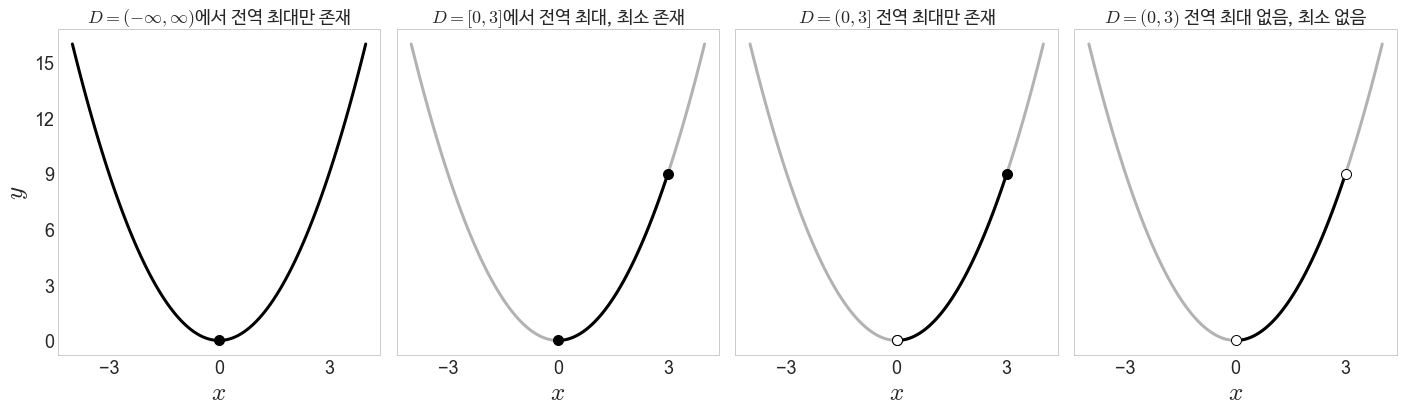

In [8]:
x = np.linspace(-4, 4, 100)
x2 = np.linspace(0, 3, 100)
y = x**2
y2 = x2**2

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, sharey=True)
fig.set_size_inches(24,6)

x_ticks = (-3, 0, 3)
y_ticks = (0, 3, 6, 9, 12, 15)

ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax1.set_xlabel('$x$', fontsize=25)
ax1.set_ylabel('$y$', fontsize=25)
ax1.grid(False)
ax1.plot(x, y, lw=3, color='k')
ax1.plot(0, 0, 'o',   color='k', markersize=10)
ax1.set_title(r'$D=(-\infty, \infty)$에서 전역 최대만 존재', fontproperties=fontprop)
ax1.set_xticks(x_ticks)
ax1.set_yticks(y_ticks)

ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax2.set_xlabel('$x$', fontsize=25)
ax2.set_ylabel('$y$', fontsize=25)
ax2.grid(False)
ax2.plot(x, y, lw=3, color='k', alpha=0.3)
ax2.plot(x2, y2, lw=3, color='k')
ax2.plot(0, 0, 'o',   color='k', markersize=10)
ax2.plot(3, 9, 'o',   color='k', markersize=10)
ax2.set_title(r'$D=[0,3]$에서 전역 최대, 최소 존재', fontproperties=fontprop)
ax2.set_xticks(x_ticks)
ax2.set_yticks(y_ticks)

ax3.xaxis.set_tick_params(labelsize=18)
ax3.yaxis.set_tick_params(labelsize=18)
ax3.set_xlabel('$x$', fontsize=25)
ax3.set_ylabel('$y$', fontsize=25)
ax3.grid(False)
ax3.plot(x, y, lw=3, color='k', alpha=0.3)
ax3.plot(x2, y2, lw=3, color='k')
ax3.plot(0, 0, 'o', color='k', markersize=10, fillstyle='none')
ax3.plot(0, 0, 'o', markersize=10, markerfacecolor='w',
         markeredgewidth=1, markeredgecolor='k')
ax3.plot(3, 9, 'o',   color='k', markersize=10)
ax3.set_title(r'$D=(0,3]$ 전역 최대만 존재', fontproperties=fontprop)
ax3.set_xticks(x_ticks)
ax3.set_yticks(y_ticks)

ax4.xaxis.set_tick_params(labelsize=18)
ax4.yaxis.set_tick_params(labelsize=18)
ax4.set_xlabel('$x$', fontsize=25)
ax4.set_ylabel('$y$', fontsize=25)
ax4.grid(False)
ax4.plot(x, y, lw=3, color='k', alpha=0.3)
ax4.plot(x2, y2, lw=3, color='k')
ax4.plot(0, 0, 'o', markersize=10, markerfacecolor='w',
         markeredgewidth=1, markeredgecolor='k')
ax4.plot(3, 9, 'o', markersize=10, markerfacecolor='w',
         markeredgewidth=1, markeredgecolor='k')
ax4.set_title(r'$D=(0,3)$ 전역 최대 없음, 최소 없음', fontproperties=fontprop)
ax4.set_xticks(x_ticks)
ax4.set_yticks(y_ticks)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax_ in [ax1, ax2, ax3, ax4]:
    ax_.label_outer()
    
plt.subplots_adjust(hspace=0.05, wspace=0.05)

if file_print == True :
    fig.savefig("imgs/chap8/fig8-4.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap8/fig8-4.pdf", format='pdf', bbox_inches='tight')

plt.show()

- 위 그림은 아래로 볼록한 어떤 함수에서 구간에 따른 전역 최대와 최소를 보여줌
    - 3, 4번째 그림은 구간이 닫혀 있지 않으므로 경우에 따라 최대 또는 최소가 존재하지 않음
    - 3번째 그림에서 함수의 최대는 f(3) = 9이지만, 구간에 0은 포함되지 않으므로 최소는 특정할 수 없음 (함숫값이 0보다 작아지지 않는다고 이야기 할 수는 있음)
    - 4번째 그림은 최대, 최소 둘 다 없으나 함수가 0보다 작아지지않고, 9보다 커지지 않음

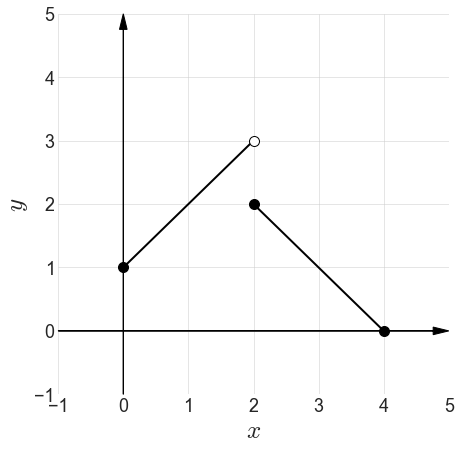

In [9]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)

f1 = lambda x : x+1
f2 = lambda x : -(x-4)

x1 = np.linspace(0, 2, 100)
x2 = np.linspace(2, 4, 100)

ax.plot(x1, f1(x1), color='k')
ax.plot(0, 1, 'o',   color='k', markersize=10)
ax.plot(2, 3, 'o', markersize=10, markerfacecolor='w',
         markeredgewidth=1, markeredgecolor='k')

ax.plot(x2, f2(x2), color='k')
ax.plot(2, 2, 'o',   color='k', markersize=10)
ax.plot(4, 0, 'o',   color='k', markersize=10)
ax.set_xlim([-1, 5])
ax.set_ylim([-1, 5])

arrowed_spines(fig, ax)

if file_print == True :
    fig.savefig("imgs/chap8/fig8-5.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap8/fig8-5.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

- 정의역이 닫힌 구간이라 하더라도 연속이 아닌 함수
    - 구간 내에서 불연속 함수이며 최소 상한 3이 존재할 뿐, 최대는 없음
    - 전역 개념과 반대로 지역적으로 가장 크고 가장 작은 값 설정 가능
    - 이 경우, 지역최대, 지역최소라고 함 (극대, 극소라고도 함)
    
### 극대와 극소

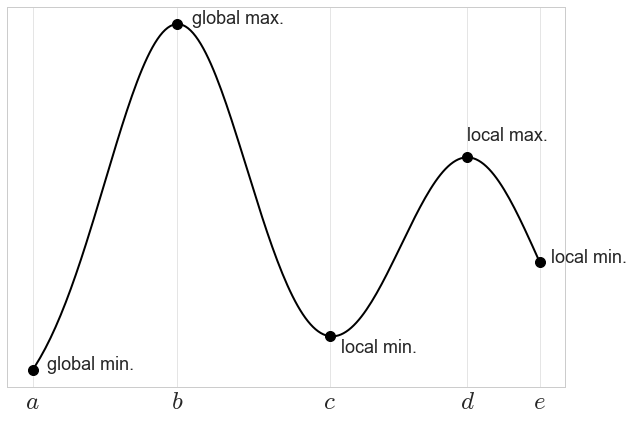

In [10]:
def N(x, mu, var):
    return 1/np.sqrt(2*np.pi*var) * np.exp( -(x-mu)**2/(2*var) )

def C_prior(c, mu_c):
    return mu_c**c * (1-mu_c)**(1-c)

def J(x, c):
    """
    P(C,X)
    """
    #return (C_marginal[1]*N(x, 3, 0.5))**c * (C_marginal[0]*N(x, 0, 1))**(1-c)
    return (C_prior(1, mu_c)*N(x, 3, 1.0))**c * (C_prior(0, mu_c)*N(x, -1, 1.0))**(1-c)

def X_marginal(x):
    """
    P(X) = P(X,C=0) + P(X,C=1)
    """
    return J(x, 0) + J(x, 1)

x = np.linspace(-3, 4, 200)
mu_c = 0.4

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
# ax.set_xlabel('$x$', fontsize=25)
# ax.set_ylabel('$y$', fontsize=25)

y = X_marginal(x)
ax.plot(x, y, color='k')

x_ticks = (-3, -1, 1+(1/4)*np.log(6/4), 3, 4)
x_ticklabels = (r'$a$', r'$b$', r'$c$', r'$d$', r'$e$')
texts = ({'dx':0.2, 'dy':0.0, 'text':'global min.'}, {'dx':0.2, 'dy':0.0, 'text':'global max.'}, 
         {'dx':0.15, 'dy':-0.01, 'text':'local min.'}, {'dx':0.0, 'dy':0.01, 'text':'local max.'}, 
         {'dx':0.15, 'dy':0.0, 'text':'local min.'})


for i, x_tick in enumerate(x_ticks):
    ax.plot(x_tick, X_marginal(x_tick), 'o', color='k', markersize=10,)
    ax.text(x_tick+texts[i]['dx'], X_marginal(x_tick)+texts[i]['dy'], 
            texts[i]['text'], fontsize=18)
    
ax.set_yticks([])
ax.set_xticks(x_ticks)
ax.set_xticklabels( x_ticklabels, fontsize=25 )

if file_print == True :
    fig.savefig("imgs/chap8/fig8-6.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap8/fig8-6.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

- c에서 함숫값은 c 근방에서 가장 작음
- d에서 함숫값은 d 근방에서 가장 크고, e에서 함숫값은 다시 근방에 가장 작음
- 특정 위치 근방에서 가장 크거나 작은 함숫값을 가질 때 그 함숫값을 극대 또는 극소라고 함